### Setup and Aims
env: robustbenchpy311 on demo

Aim:
To test the generative inference of robustbench models.

In [ ]:
#https://github.com/RobustBench/robustbench#notebooks

In [1]:
import torch 
from robustbench.data import load_imagenet3dcc
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model as load_model_robustbench

/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = torch.device("cuda:0")
model = load_model_robustbench('Standard_R50', dataset='imagenet', threat_model='corruptions').to(device)


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
%reload_ext autoreload
%autoreload 2

import socket
import os
if socket.gethostname().startswith('ax'):
    path_prefix = '/mnt/smb/locker/miller-locker/users/Tahereh'
    path_codes = '/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    sys.path.append('/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Illusions')
elif socket.gethostname().startswith('demo'):
    path_prefix = '/home/tahereh/engram/users/Tahereh'
    path_codes = '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    
print(os.getcwd())

## Settings of results 
fontsize_text = 25
color_text = 'mediumseagreen'
fontsize_text = 12


resultsdir = os.path.join(path_prefix, 'Research/Results/Generative_Inference')

# get the labels for imagenet
from Stimuli.load_stimuli import labels_imagenet


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference
Kernel running on local computer 'demo'.
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']
image names:  ('self', 'image_name', 'image_original', 'cmap')


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


In [29]:
import torch

# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
class Args:
    def __init__(self) -> None:
        self.model_arch = 'resnet50'
        
        self.dataset_model = 'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        self.model_training ='advrobust_L2_eps_3.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
        # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
        # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
        self.epoch_chkpnt = 100 #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
        self.eval_dataset_identifier = 'vggface2_test'
        self.batch_size = 32


args = Args()

if args.dataset_model == 'vggface2':
    assert args.model_training == 'advrobust_L2_eps_0.50'
    args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.n_classes = 500
elif 'imagenet' in  args.dataset_model or 'places365' in args.dataset_model:
    args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
    args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
    args.n_classes = 1000
else:
    raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
          

#'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
# Load the model -----------------------------
model_args = {'model_arch': args.model_arch, 
              'model_training': args.model_training,
              'dataset': args.dataset_model,
              'epoch_chkpnt': args.epoch_chkpnt,
              'norm_mean': args.norm_mean,
              'norm_std': args.norm_std,
              'n_classes': args.n_classes,
            #   'inference': args.inference
              }

# from Models import load_models
# model, _ = load_models.load_models(model_args)
# model = torch.nn.DataParallel(model).cuda()
# _=model.eval()
# print(model_args)
# if model_training.startswith('bench'):
# model = load_model_robustbench('Singh2023Revisiting_ViT-S-ConvStem', dataset='imagenet', threat_model='Linf').to(device)

model = load_model_robustbench('Liu2023Comprehensive_Swin-L', dataset='imagenet', threat_model='Linf').to(device)

# else:
#     pass
    # from Models import load_models
    # model, _ = load_models.load_models(model_args)
    # model = torch.nn.DataParallel(model).cuda()
    # _=model.eval()
    # print(model_args)
    
model = torch.nn.DataParallel(model.model).cuda()
_=model.eval()

Downloading...
From (original): https://drive.google.com/uc?id=1-57sQfcrsDsslfDR18nRD7FnpQmsSBk7
From (redirected): https://drive.google.com/uc?id=1-57sQfcrsDsslfDR18nRD7FnpQmsSBk7&confirm=t&uuid=374950bd-bf9b-4172-a741-b7f44043fe6b
To: /home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/models/imagenet/Linf/Liu2023Comprehensive_Swin-L.pt
100%|██████████| 788M/788M [00:09<00:00, 81.5MB/s] 
/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/robustbench/utils.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed dur

In [30]:
print(model)

DataParallel(
  (module): SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
    )
    (layers): Sequential(
      (0): SwinTransformerStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=192, out_features=576, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=192, out_features=192, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path1): Identity()
            (norm2): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=192, out_features=768, 

In [31]:
## test the generative inference function
from Stimuli.load_stimuli import ImageLoader
from Inference.Generative_infernece import generative_inference

model_config = {'model': model, 'dataset_model': args.dataset_model, **model_args}
## pretty print the model_config
inference_config = {'loss_infer': 'ReverseDiffusion',# #'IncreaseConfidence', #'ReverseDiffusion', 
                    'loss_function': 'MSE',#'MSE',# #'CE', #'MSE', 
                    'n_itr':101, 
                    'eps': 20, #0.5, 
                    'step_size': 0.8, #3
                    'diffusion_noise_ratio': 0.005,#0.05, 
                    'initial_inference_noise_ratio': 0.5,#0.05, #0.1, 
                    # 'iterations_to_show': [0, 1,  4, 8, 16, 20, 30, 40, 60, 80, 90, 100],
                    'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 80, 90, 100],
                    # 'iterations_to_show': [0, 1, 2, 4, 16, 32, 64, 80, 100, 200, 400, 500, 600, 700, 800, 900, 1000],
                    'top_layer': '8', #'layer4', #'avgpool', #'all',
                    'inference_normalization': 'off',
                    'recognition_normalization': 'off',
                    'misc_info': {'keep_grads': True,}
                    }



image_name = 'FigureGroundLamme' #'FigureGroundUniform' #'FigureGroundLamme' ##'FigureGroundTexture' #'FigureGroundUniform' #'FigureGroundLamme'# 'FigureGroundLammeBordersDetected' #'FigureGroundLamme'
image, cmap = ImageLoader(args.dataset_model).load_image(image_name)


selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict = generative_inference(model_config, image, inference_config)
iteration_numbers = inference_config['iterations_to_show']
if inference_config['misc_info']['keep_grads']:
    selected_grad_patterns = misc_info_dict['grad_info']
else:
    selected_grad_patterns = []

AttributeError: 'SwinTransformer' object has no attribute 'pos_drop'

In [25]:
## test the generative inference function
from Stimuli.load_stimuli import ImageLoader
from Inference.Generative_infernece import generative_inference

model_config = {'model': model, 'dataset_model': args.dataset_model, **model_args}
## pretty print the model_config
inference_config = {'loss_infer': 'ReverseDiffusion',#'IncreaseConfidence',# #'IncreaseConfidence', #'ReverseDiffusion', 
                    'loss_function': 'MSE',#'MSE',# #'CE', #'MSE', 
                    'n_itr':101, 
                    'eps': 3, #0.5, 
                    'step_size': 5, #3
                    'diffusion_noise_ratio': 0.003,#0.05, 
                    'initial_inference_noise_ratio': 0.1,#0.05, #0.1, 
                    'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 80, 90, 100],
                    # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 32, 64, 80, 100, 128, 160, 180, 200, 240, 280, 320, 420, 520, 620, 720, 820, 920,],
                    'top_layer': '12', #'layer4', #'avgpool', #'all',
                    'inference_normalization': 'off',
                    'recognition_normalization': 'off',
                    'misc_info': {'keep_grads': True,}
                    }



image_name = 'KanizsaSq' #'KanizsaRealContours' #'KanizsaSq' 
image, cmap = ImageLoader(args.dataset_model).load_image(image_name)


selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict = generative_inference(model_config, image, inference_config)
iteration_numbers = inference_config['iterations_to_show']
if inference_config['misc_info']['keep_grads']:
    selected_grad_patterns = misc_info_dict['grad_info']
else:
    selected_grad_patterns = []

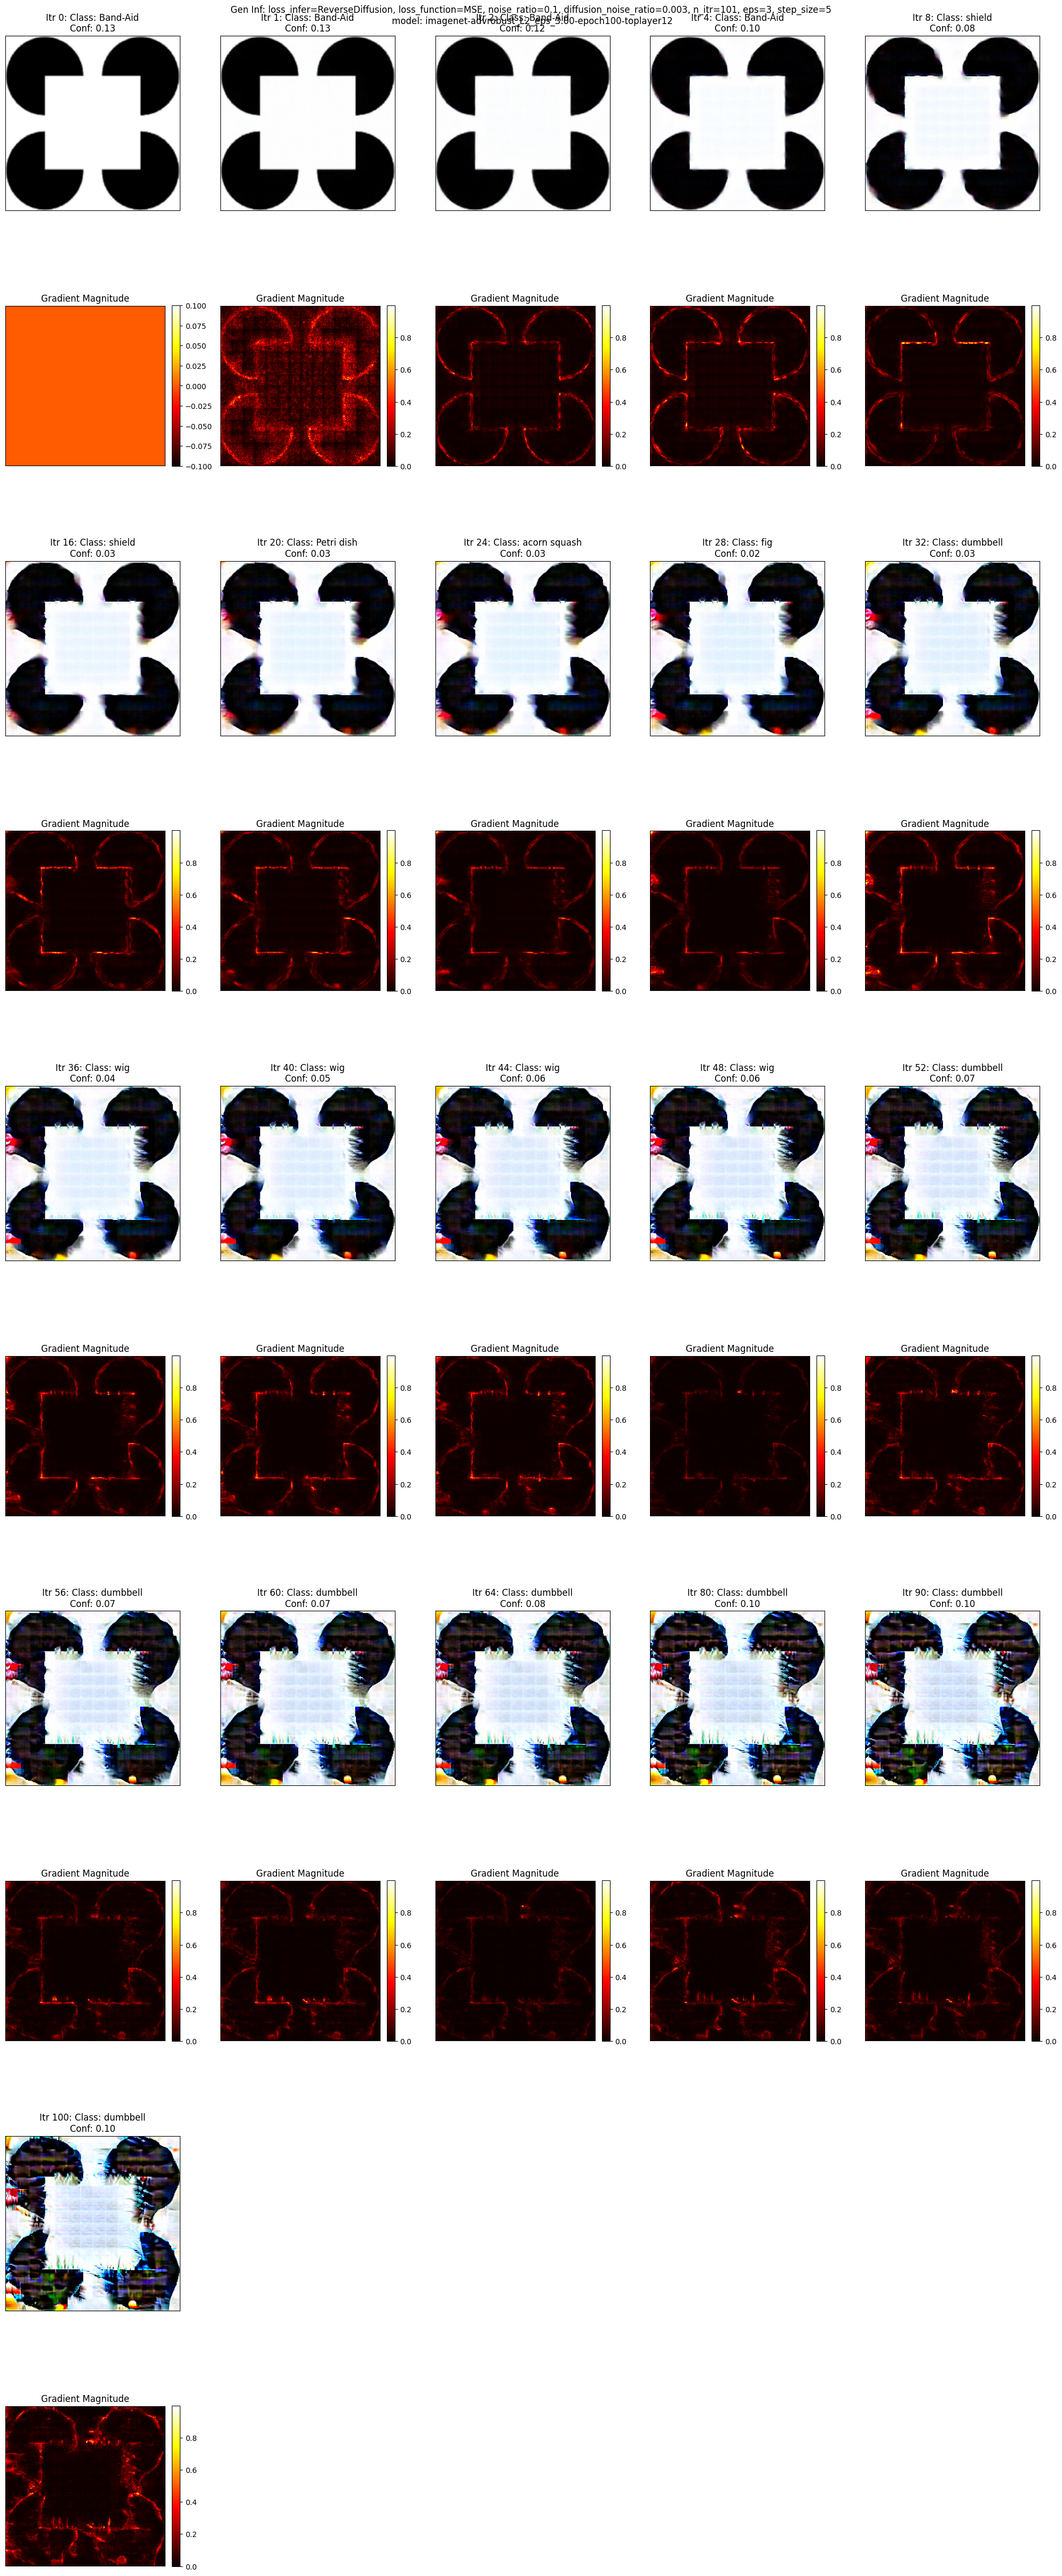

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

# show the images and gradients in a grid - now with 2 rows per pattern
n_cols = 5
n_pattern_rows = len(selected_inferred_patterns)//n_cols + (1 if len(selected_inferred_patterns)%n_cols > 0 else 0)
if n_pattern_rows == 0:
    n_pattern_rows = 1
# Double the rows to accommodate gradients below each image
n_total_rows = n_pattern_rows * 2
fig, axes = plt.subplots(n_total_rows, n_cols, figsize=[20, 5*n_pattern_rows * 2])

if model_config['dataset_model'] == 'vggface2':
    norm_mean = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
elif model_config['dataset_model'] == 'imagenet' or model_config['dataset_model'] == 'imagenetvggface2':
    norm_mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1).cuda()

for i in range(len(selected_inferred_patterns)):
    # Calculate positions for image and gradient
    row_idx = (i // n_cols) * 2  # Multiply by 2 to skip rows for gradients
    col_idx = i % n_cols
    
    # Get axes for both image and gradient
    if n_pattern_rows == 1:
        ax_img = axes[0] if n_cols == 1 else axes[col_idx]
        ax_grad = axes[1] if n_cols == 1 else axes[n_cols + col_idx]
    else:
        ax_img = axes[row_idx, col_idx]
        ax_grad = axes[row_idx + 1, col_idx]
        
    # Get the image and corresponding gradients
    image_to_compute = selected_inferred_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    gradients = selected_grad_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    
    # Normalize gradients for visualization
    grad_magnitude = np.sqrt(np.sum(gradients**2, axis=2))
    grad_normalized = (grad_magnitude - grad_magnitude.min()) / (grad_magnitude.max() - grad_magnitude.min() + 1e-8)
        
    
    predicted_emotion = 'N/A'
    confidence_emotion = 0
    first_itr_conf_got_high = 0
    emotion_detected = False
    color_title = 'black'
    
    # Plot image in top subplot
    ax_img.imshow(image_to_compute)
    # Plot gradient heatmap in bottom subplot
    gradient_plot = ax_grad.imshow(grad_normalized, cmap='hot')
    plt.colorbar(gradient_plot, ax=ax_grad, fraction=0.046, pad=0.04)
    
    # Set titles
    if model_config['dataset_model'] == 'imagenet':
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {labels_imagenet[perceived_categories[i]]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    else:
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {perceived_categories[i]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    
    ax_grad.set_title('Gradient Magnitude')
    
    # Remove ticks from both subplots
    ax_img.set_xticks([])
    ax_img.set_yticks([])
    ax_grad.set_xticks([])
    ax_grad.set_yticks([])

fig.suptitle(f'Gen Inf: loss_infer={inference_config["loss_infer"]}, loss_function={inference_config["loss_function"]}, noise_ratio={inference_config["initial_inference_noise_ratio"]}, diffusion_noise_ratio={inference_config["diffusion_noise_ratio"]}, n_itr={inference_config["n_itr"]}, eps={inference_config["eps"]}, step_size={inference_config["step_size"]}\n model: {args.dataset_model}-{args.model_training}-epoch{args.epoch_chkpnt}-toplayer{inference_config["top_layer"]}')

# Remove empty axes
for i in range(n_total_rows):
    for j in range(n_cols):
        pattern_idx = (i//2) * n_cols + j
        if pattern_idx >= len(selected_inferred_patterns):
            if n_pattern_rows > 1:
                fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# # Save figure
# figsave_dir = os.path.join(resultsdir, f'{args.dataset_model}-{args.model_training}-{args.epoch_chkpnt}/')
# if not os.path.exists(figsave_dir):
#     os.makedirs(figsave_dir)

# fig_name = f'{image_name}_{inference_config["top_layer"]}_geninf_{model_config["dataset_model"]}_{model_config["model_training"]}_epoch{model_config["epoch_chkpnt"]}_{inference_config["loss_infer"]}_{inference_config["loss_function"]}_noise_ratio{inference_config["initial_inference_noise_ratio"]}_diffusion_noise_ratio{inference_config["diffusion_noise_ratio"]}_n_itr{inference_config["n_itr"]}_eps{inference_config["eps"]}_step_size{inference_config["step_size"]}'
# fig_name = fig_name + f'_confitr{first_itr_conf_got_high}_{emotion_detected}_with_gradients'

# instance_counter = 0
# while os.path.exists(os.path.join(figsave_dir, fig_name+'.pdf')):
#     print('file already exists, adding instance number')
#     if 'instance' in fig_name:
#         fig_name = fig_name.split('_instance')[0]
#     fig_name = fig_name + f'_instance{instance_counter}'
#     instance_counter += 1

# fig.savefig(os.path.join(figsave_dir, fig_name+'.pdf'), dpi=300, bbox_inches='tight')
# print('saved at:', os.path.join(figsave_dir, fig_name+'.pdf'))

# # Save results dictionary
# dict_results = {
#     'model_config': model_config,
#     'inference_config': inference_config,
#     'selected_inferred_patterns': selected_inferred_patterns,
#     'selected_grad_patterns': selected_grad_patterns,
#     'perceived_categories': perceived_categories,
#     'iteration_numbers': iteration_numbers,

# }
# np.save(os.path.join(figsave_dir, fig_name+'.npy'), dict_results)

In [1]:
import timm

def get_features(model, layer_name=''):
    """
    Get features from any timm model using a consistent API
    """
    # Return full model if no layer specified
    if layer_name == 'all':
        return model
    
    # Get features up to specified layer
    return timm.create_model(
        model_name,
        features_only=True,
        out_indices=[layer_name] if isinstance(layer_name, int) else None
    )

/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import timm
import torch

# For ResNet50
def test_resnet50_features():
    # Create model 
    model = timm.create_model('resnet50', pretrained=True, features_only=True)
    
    # By default returns features from all major blocks
    # Default out_indices=(0,1,2,3,4) corresponds to outputs of:
    # layer1, layer2, layer3, layer4, and after pooling
    x = torch.randn(1, 3, 224, 224)
    features = model(x)
    
    # Print feature shapes at each block
    for i, f in enumerate(features):
        print(f'ResNet50 features from block {i}: {f.shape}')
        
    # To get features only from specific blocks:
    model_block3 = timm.create_model('resnet50', pretrained=True, 
                                    features_only=True, out_indices=[3])
    features_block3 = model_block3(x)
    print(f'ResNet50 features from only block 3: {features_block3[0].shape}')

# For ViT-Base
def test_vit_features():
    # Create model
    model = timm.create_model('vit_base_patch16_224', pretrained=True, features_only=True)
    
    # For ViT, out_indices specifies which transformer blocks to return features from
    # Default gets features from all blocks
    x = torch.randn(1, 3, 224, 224)
    features = model(x)
    
    # Print feature shapes
    for i, f in enumerate(features):
        print(f'ViT features from block {i}: {f.shape}')
    
    # Get features from specific block
    model_block8 = timm.create_model('vit_base_patch16_224', pretrained=True,
                                    features_only=True, out_indices=[8])
    features_block8 = model_block8(x)
    print(f'ViT features from only block 8: {features_block8[0].shape}')

# Run tests
if __name__ == '__main__':
    print("Testing ResNet50 feature extraction:")
    test_resnet50_features()
    print("\nTesting ViT feature extraction:")
    test_vit_features()

Testing ResNet50 feature extraction:
ResNet50 features from block 0: torch.Size([1, 64, 112, 112])
ResNet50 features from block 1: torch.Size([1, 256, 56, 56])
ResNet50 features from block 2: torch.Size([1, 512, 28, 28])
ResNet50 features from block 3: torch.Size([1, 1024, 14, 14])
ResNet50 features from block 4: torch.Size([1, 2048, 7, 7])
ResNet50 features from only block 3: torch.Size([1, 1024, 14, 14])

Testing ViT feature extraction:
ViT features from block 0: torch.Size([1, 768, 14, 14])
ViT features from block 1: torch.Size([1, 768, 14, 14])
ViT features from block 2: torch.Size([1, 768, 14, 14])
ViT features from only block 8: torch.Size([1, 768, 14, 14])


In [5]:
import torch
import timm
from collections import OrderedDict

def extract_features(model_name):
    """Extracts the main feature-extracting layers from a timm model."""
    model = timm.create_model(model_name, pretrained=False, features_only=False)
    model.eval()

    if 'resnet' in model_name.lower() or 'wide-resnet' in model_name.lower():
        # ResNets: Extract layer1, layer2, layer3, layer4, and avgpool
        feature_layers = ['layer1', 'layer2', 'layer3', 'layer4', 'avgpool']

    elif 'convnext' in model_name.lower():
        # ConvNeXt: Extracts the main stages
        feature_layers = ['stages']

    elif 'vit' in model_name.lower():
        # ViT: Extract transformer blocks
        feature_layers = ['blocks']

    elif 'swin' in model_name.lower():
        # Swin Transformer: Extract stages
        feature_layers = ['stages']

    else:
        raise ValueError(f"Unknown model type: {model_name}")

    modules = list(model.named_children())
    extracted_modules = OrderedDict()

    for name, module in modules:
        if name in feature_layers:
            extracted_modules[name] = module

    return torch.nn.Sequential(extracted_modules)

# Example usage:
model_name = 'swin_small_patch4_window7_224' #"vit_base_patch16_clip_224"#"resnet50"  # Change this to any model from the list
features = extract_features(model_name)
print(features)

Sequential()


In [3]:
#
#list some ViT from timm
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r